<a href="https://colab.research.google.com/github/FernandoGuirraS/sigmoidal_data_science/blob/main/Projetos_Fraudes_em_Cartoes_de_Credito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fraudes em Cartões de Crédito

Com o aumento de compras com cartões de crédito e em meios digitais, mostrando a alta frequência de compras pelos consumidores, o número de fraudes relacionadas a pagamentos teve um grande crescimento. Por conta disso, esse notebook tem como objetivo realizar o estudo das **Fraudes em Cartões de Crédito**, principal produto oferecido pelas fintechs e o queridinho do consumidor.

Há quem goste de cartão de créito e aqueles que preferem realizar o pagamento direto pelo dinheiro, mas com o aumento no número de fintechs, o número de pessoas com cartão de crédito aumento bastante, e com isso o aumento de crimes envolvendo os cartões de crédito.

De acordo com a Confederação Nacional de Dirigentes Lojistas (CNDL) e do Serviço de Proteção ao Crédito (SPC Brasil), houve um aumento significativo nas fraudes ocorridas pela internet. Segundo a [ClearSale](https://blogbr.clear.sale/confira-o-mapa-da-fraude), foram R$ 3,6 bilhões em tentativas de fraude em 2020 no Brasil, onde a maior parte das fraudes são no comércio virtual.

No Brasil, houve um aumento no número de compras, onde o cartão de crédito é um dos meios de pagamento mais utilizado, mesmo com o surgimento de diferentes meios de pagamentos. Na maioria das vezes a fraude acontece por um descuido do consumidor, com cliques em links indevidos, sites de compras/ligações duvidosas. Em contramão, as instituições financeiras estão aumento as ferramentas de segurança para conter esse aumento de ataques. A fraude traz perdas financeiras e perda da reputação de um negócio.

Por esse motivo, vem crescendo o número de estudos relacionados a fraudes com o uso de inteligência artificial, no intuito de diminuir, evitar e inibir esse tipo de fraude. Aqui vamos tratar esse assunto e realizar uma análise e previsão de fraudes por meio de Cartões de Crédito, com uso de técnicas de exploração e visualização de dados, mas também o uso de técnicas de inteligência artificial para previsão de ações fraudulentas.

<p align=center>
<img src="http://sigmoidal.ai/wp-content/uploads/2019/12/900.jpg" width="75%"></p>

Dentra essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acaretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*. 

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Obtenção dos dados

O dataset é composto por transações de titulares de cartões de crédito europeus, em setembro de 2013, com transações ocorridas em dois dias, onde foram constatadas $492$ fraudes de $284807$ transações, representando $0.172\%$ das fraudes. O conjunto de dados possui apenas variáveis numéricas, resultados das transações PCA, onde as colunas $\[V_1, V_2, V_3, \ldots, V_28\]$ são os principais componentes. Ainda temos as colunas "Tempo", que contém os segundos entre cada transação, "Amount", é o amount de transação, e "Classe", variável resposta que representa se é fraude ($1$) ou não ($0$).

In [1]:
# Importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

Os dados são disponibilizados pelo Kaggle através do [link](https://www.kaggle.com/mlg-ulb/creditcardfraud) e será importada através da biblioteca *pandas*, utilizando o método `pd.read_csv`, para realização da análise. 
Como o arquivo baixado a partir do [link kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud), pelo tamanho do arquivo ser maior que $25$**MB**, não será possível realizar o upload pelo github. O mesmo será realizado fazendo upload através do google drive, pelo [link](https://drive.google.com/file/d/1E6AUoEHosyxCznXcI6MZ1prRIIfnLPXn/view?usp=sharing).

In [2]:
# endereço do link
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importar os dados para um dataframe
df = pd.read_csv(file_path)

Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.

## Análise Exploratória

A etapa de análise exploratória é composta pela exploração e investigação dos dados, no intuito de extrair informações relevantes sobre o conjunto de dados. Para isso, vamos iniciar verificando as primeiras 5 linhas do *dataset.*

In [3]:
# primeiras linhas do dataset
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Podemos observar, acima, que o conjunto de dados é composto por variáveis que vão de $V_1$ a $V_{28}$, além do montante e tempo da operação. Os $V_i$'s representam os componentes PCA da operação do cartão. Para entedimento de cada variável, abaixo encontra-se o dicionário com o significado de cada uma.

### Dicionário de variáveis:

* `time` - Número de segundos decorridos entre esta transação e a primeira transação no conjunto de dados;
* `Vi's` - pode ser resultado de uma redução da Dimensionalidade do PCA para proteger as identidades do usuário e recursos confidenciais (v1-v28);
* `Amount` - Valor da transação;
* `Class` - 1 para transações fraudulentas, 0 caso contrário.

A partir disso, vamos verificar um resumo estatístico das variáveis para tentar encontrar alguma relação entre elas.

In [4]:
# resumo estatistico
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Com os resultados acima, podemos observar que as transações possuem valores $V_i$'s muito próximos uma das outras, que estão relacionadas as verificações da transação. O tempo de cada transação possuem valores muito distintos, com média de tempo em $94913$ segundos, com desvio padrão em $47488$ segundos, demonstrando tempo de transações muito distantes uma das outras. A variável `amount` representa o montante de cada transação. Podemos observar que são transações com valores baixos, onde $75\%$ da transações estão abaixo de $77$ reais.

### Possui valores ausentes?

Os valores ausentes indica a qualidade dos dados de um dataset. Podemos observar que o conjunto de dados não contém nenhum valor ausente, o que indica uma ótima qualidade do dataset para realização das análises.

In [5]:
# valores ausentes
(df.isnull().sum() / df.shape[1]) * 100

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

### Como é o balanceamento do dataset?

As variáveis $V_i$'s possuem distribuições muito semelhantes, se concentrando uma porcetagem maior de valores em torno do zero, semelhantes a uma distribuição normal. O tempo de processamento possui distribuição muito distintas, com transações onde o tempo se concentra em torno de $50000$ e $150000$ segundos.

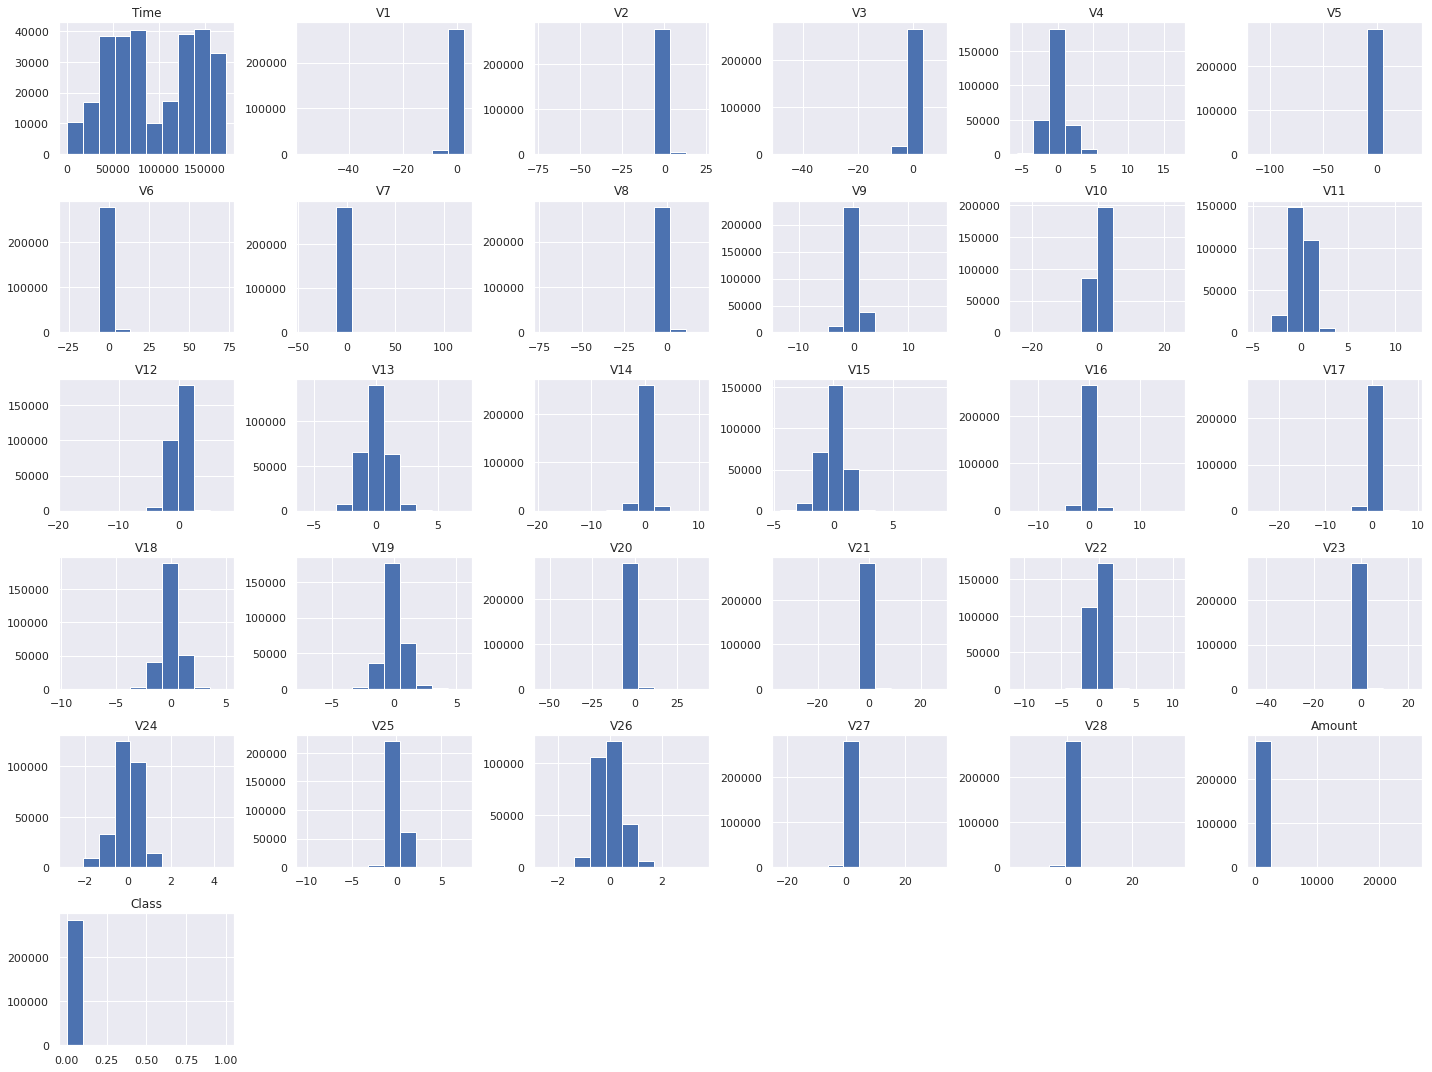

In [6]:
# histograma dos dados
df.hist(figsize=(20,15))
plt.tight_layout();

### Explorando a variável `Time` e `Amount`

Quando comparamos a variável tempo com a classe não fraudulenta, podemos observar que o tempo de transações são maiores, consomem mais tempo para realização de todos os protocolos. Podemos observar que as transações fraudulentas são em número menor, mas a grande maioria possui tempo de transação abaixo de $75000$ segundos.

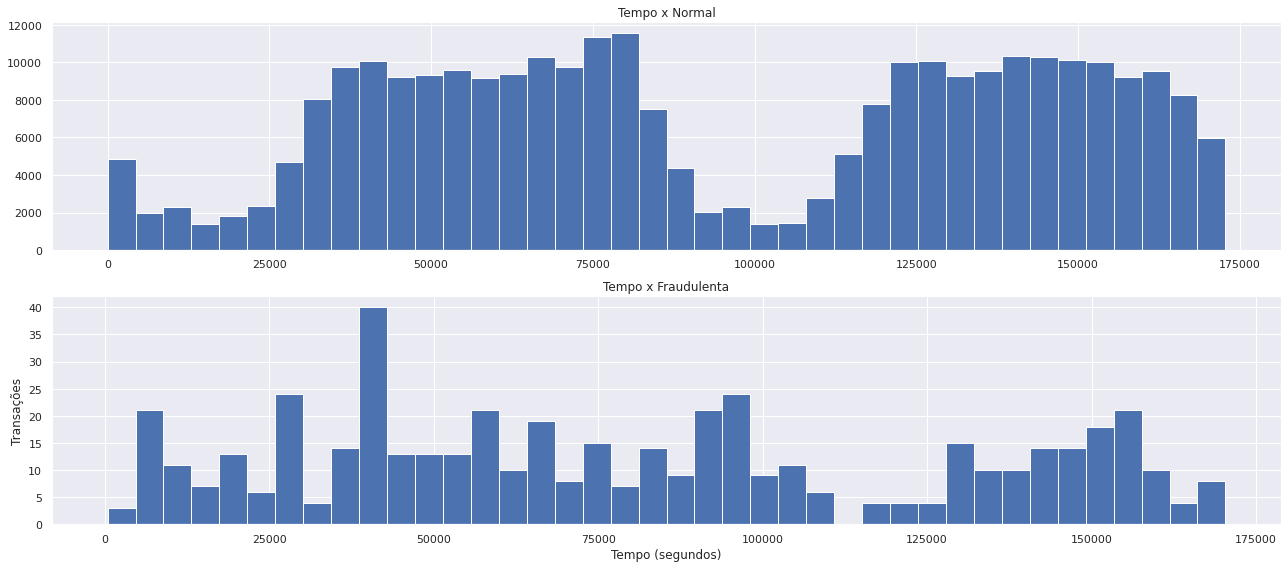

In [7]:
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(18, 8))

ax[0].hist(df.Time[df.Class == 0], bins=40)
ax[0].set_title('Tempo x Normal')

ax[1].hist(df.Time[df.Class == 1], bins = 40)
ax[1].set_title('Tempo x Fraudulenta')

plt.xlabel('Tempo (segundos)')
plt.ylabel('Transações')
plt.tight_layout();

As ações fraudulentas ocorrem de várias maneiras. Uma delas são a realização de transações de valores menores para verificar se ocorre todas as etapas para transação. Observando o gráfico abaixo podemos verificar que existe um grande número de transações abaixo de $500$ reais e que chegam até $2000$ reais. 

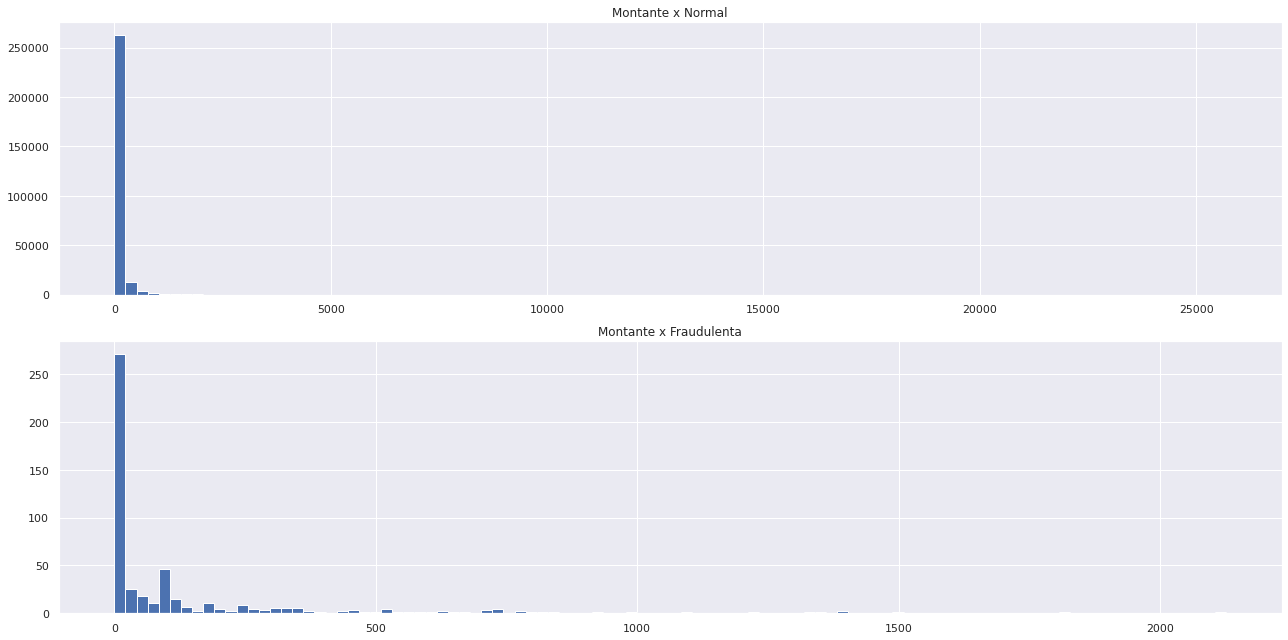

In [8]:
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(18, 9))

ax[0].hist(df.Amount[df['Class'] == 0], bins=100)
ax[0].set_title('Montante x Normal')

ax[1].hist(df.Amount[df.Class == 1], bins=100)
ax[1].set_title('Montante x Fraudulenta')

plt.tight_layout();

### Aprofundando análise na variável `Amount`

A variável `Amount` possui distribuições bem distintas uma das outras. Podemos observar que a maioria dos valores de transações normais se encontram entre $0$ e $200$ reais, onde a mediana se encontra abaixo de $50$ reais. Os valores acima de $200$ reais são chamados de outliers, o que nos resta uma investigação aprofundada. Já os montantes de transações fraudulentas possui a maioria dos valores entre $0$ e $250$ reais. Essa distinção dos valores ajuda no modelo de machine learning.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


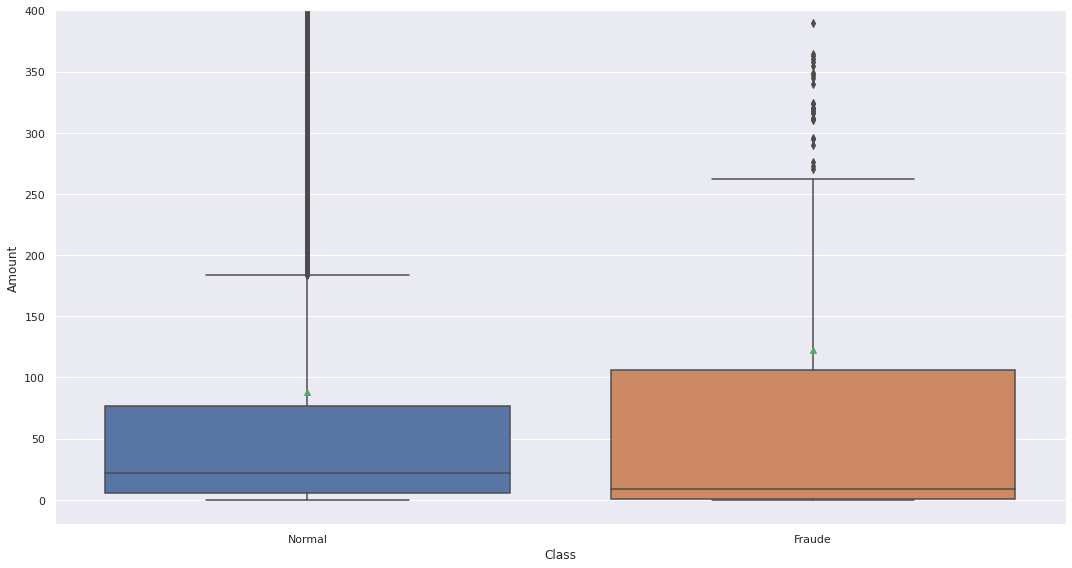

In [9]:
fig, ax = plt.subplots(figsize=(15,8), sharex=True)

sns.boxplot(df.Class, df.Amount, showmeans=True, ax=ax)
plt.ylim((-20, 400))
plt.xticks([0, 1], ['Normal', 'Fraude'])

plt.tight_layout();

### Qual a correlação entre as variáveis?

Podemos observar poucas correlações entre as variáveis, mas encontramos informações relevantes nas variáveis `time`, `amount` e `Class`. O tempo possui algumas correlações com as variáveis $V_i$'s, tanto positivas como negativas. Também podemos observar correlações nas variáveis `Amount` e `Class` com alguns dos $V_i$'s.

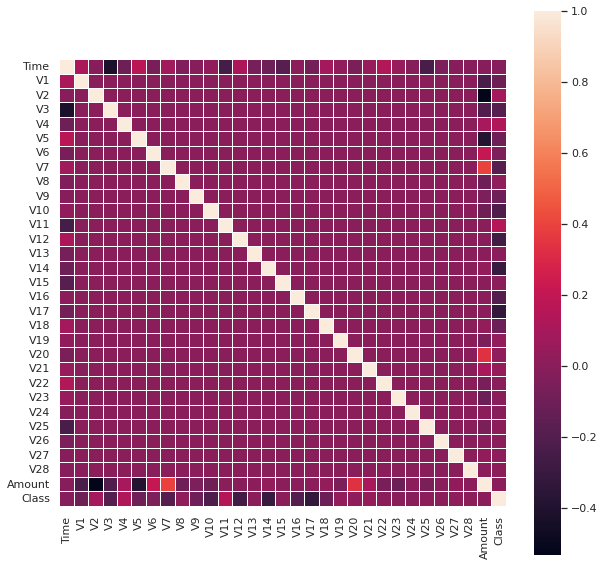

In [12]:
fig, ax = plt.subplots(figsize=(10,10))
corr = df.corr()

sns.heatmap(corr, cmap='rocket', square=True, linewidths=.1, ax=ax)

## Preparação dos Dados

Essa etapa é para preparação dos dados para construção do modelo de machine learning. 

Ao final da etapa de análise exploratória, podemos observar inconsistência nos dados, principalmente nas variáveis `Time` e `Amount`. Os dados dessas variáveis não estão normalizados. Os dados do dataset estão desbalanceados.



* Normalizar os dados que ainda não haviam sido pré-processados (`Time` e `Amount`)
* Dividir o conjunto de dados entre treino e teste

### Normalização dos dados `Time` e `Amount`

Essa etapa é para preparar os dados antes da criação do modelo de machine learning, através da classe `StandardScaler`.

In [13]:
from sklearn.preprocessing import StandardScaler

In [26]:
df_norm = df.copy()

scaler = StandardScaler()
df_norm['Amount_norm'] = scaler.fit_transform(df_norm['Amount'].values.reshape(-1,1))
df_norm['Time_norm'] = scaler.fit_transform(df_norm['Time'].values.reshape(-1,1))

### Divisão do conjunto de dados

Antes de proceder com o balanceamento de dados, devemos separar os dados já existentes entre treino e teste. Caso contrário, não teremos parâmetros para conferir se o balanceamento foi adequado.

A separação entre dados de treino e teste será realizada através da classe `train_test_split`. Para garantir que os conjuntos de treino e teste tenham a mesma quantidade de classes proporcionalmente, passamos `shuffle=True`.

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = df_norm.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)

### Balanceamento do conjunto de dados

Usando a biblioteca `imblearn` é possível aplicar facilmente técnicas de balanceamento de dados. No caso, a opção neste projeto foi usar *Under-sampling*, preservando a classe minoritária.

In [29]:
from imblearn.under_sampling import RandomUnderSampler

1    369
0    369
Name: Class, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


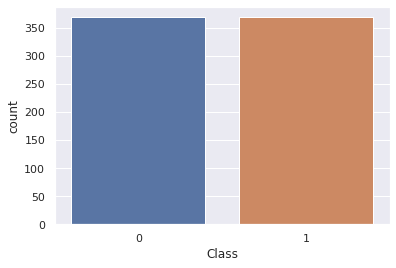

In [31]:
# usar técnica under-sampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

# ver o balanceamento das classes
print(pd.Series(y_rus).value_counts())

# plotar a nova distribuição de classes
sns.countplot(y_rus);

Com os dados balanceados, podemos ver a matriz de correlação e identificar quais variáveis estão mais fortemente relacionadas com as outras.

Observe como anteriormente, sem o balanceamento de dados, a matriz de correlação não trazia nenhuma informação relevante. Entretanto, ela traz muito mais informações após um correto balanceamento.

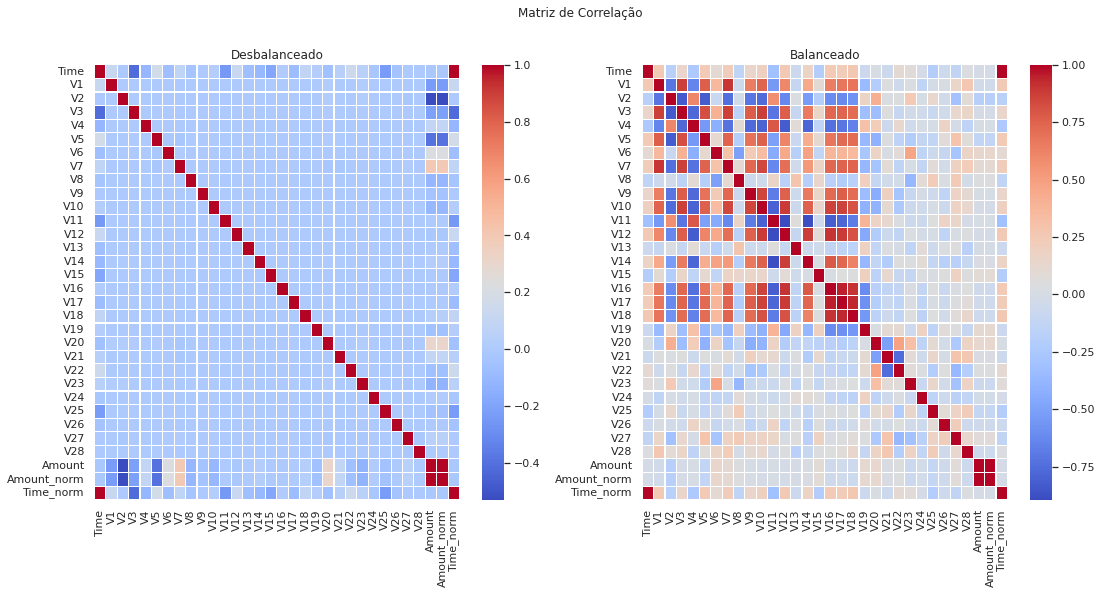

In [32]:
# plotar a matriz de correlação
corr = X_train.corr()
corr_rus = pd.DataFrame(X_rus).corr()


fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (18,8))
fig.suptitle('Matriz de Correlação')

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[0])
ax[0].set_title('Desbalanceado')

sns.heatmap(corr_rus, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[1])
ax[1].set_title('Balanceado')

plt.show()

## Modelo de Machine Learning

Para o modelo de machine learnig, vamos utilizar um modelo para **classificação**, especificamente o método de **Regressão Logistíca**, que tem por objetivo a predição de valores categóricos. 

Nosso conjunto de dados é relacionado a transações de cartões fraudulentas. Então nosso modelo categórico terá o objetivo de tentar prever, da melhor maneira, se uma determinada transação é fraudulenta ou não.

Para iniciarmos, vamos realizar a importação do modelo a partir do método ``LogisticRegression``. Com os dados de treino e teste divididos, vamos realizar o treinamento.

In [33]:
# importando o metodo logisticregression
from sklearn.linear_model import LogisticRegression

In [34]:
# instanciando o modelo
model = LogisticRegression()

# treinando o modelo com dados de treino e teste
model.fit(X_rus, y_rus)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

Com o modelo treinado com os dados de treino e teste, podemos realizar a predição a partir dos dados restantes para verificar a precisão do modelo.

In [36]:
# prevendo com o modelo
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

## Avaliar o desempenho do modelo

Com o modelo treinado e as respectivas predições, vamos realizar a avaliação do modelo. Para fins de avaliação, foi utilizado apenas o relatório de classficação onde contém as informações de precisão, acurácia do modelo e outras métricas.

Problemas onde os dados são desbalanceados, a acurácia não é uma boa métrica para avaliação. Para isso devemos olhar para a coluna `recall`, que descreve a porcentagem de acerto de cada classe. Podemos verificar, mais precisamente, com a matriz de confusão. 

Podemos observar que o modelo de machine learning teve uma alta taxa de precisão, acertando mais de $93\%$ os dados. Portando, obteve uma taxa de precisão bem precisa.


In [55]:
#@title
!pip install -q scikit-plot

In [56]:
# importando metricas de avaliação do modelo
import scikitplot as skplt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [41]:
# imprimir relatorio de classificação
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71079
           1       0.06      0.93      0.11       123

    accuracy                           0.98     71202
   macro avg       0.53      0.95      0.55     71202
weighted avg       1.00      0.98      0.99     71202



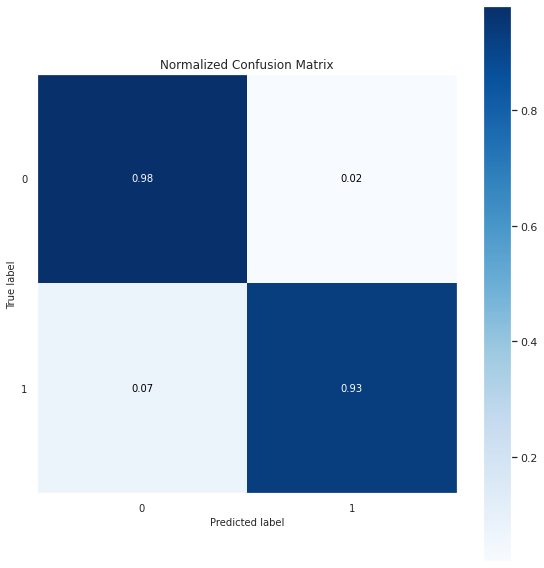

In [61]:
# matriz de confusão através da biblioteca scikitplot
fig, ax = plt.subplots(figsize=(8,8))
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True, ax=ax)
plt.tight_layout()

## Conclusão

Como observamos, o processo de machine learning deve ser bem estruturado, os dados bem tratados e balanceados. Aqui realizamos a classificação através do modelo de regressão logística. Apesar do resultado final ter sido muito bom, devemos analisar testes em outros algoritmos para verificar o desempenho.